In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.io as pio 
pio.renderers.default = "svg"

In [30]:
raw_df = pd.read_csv('Zomato_Chennai_Listing_2020.csv') 

In [31]:
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [32]:
raw_df.shape 

(12032, 12)

In [33]:
raw_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          12032 non-null  object 
 8   Dining Rating Count    12032 non-null  object 
 9   Delivery Rating        12032 non-null  object 
 10  Delivery Rating Count  12032 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [34]:
raw_df.describe()

,Price for 2
count,12032.000000
mean,397.611370
std,332.045938
min,40.000000
25%,200.000000
50%,300.000000
75%,450.000000
max,5000.000000


# Cleaning the Dataset

a. Removing the redundunt rows of data


In [35]:
# Checking redundunt rows of data 
#wrong data holds true for bad rows ie header rows
 
raw_df['Cuisine'] == 'Cuisine' 

0        False
1        False
2        False
3        False
4        False
         ...  
12027    False
12028    False
12029    False
12030    False
12031    False
Name: Cuisine, Length: 12032, dtype: bool

There is no Redundant rows here so proceeding further

In [36]:
# Dropping columns which are not required for further analysis 
 
raw_df.drop(['Zomato URL','Address','Top Dishes','Delivery Rating','Delivery Rating Count'], axis = 1, inplace=True) 

In [37]:
 raw_df.head() 

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],500.0,4.3,1500,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...",1000.0,4.4,3059,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...",500.0,4.3,1361,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",500.0,4.0,1101,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...",450.0,4.2,617,"['Home Delivery', 'Indoor Seating']"


# b. Removing the Null Records

In [38]:
 # Checking for Null records 
 
raw_df.isnull().sum()

Name of Restaurant     0
Location               0
Cuisine                0
Price for 2            0
Dining Rating          0
Dining Rating Count    0
Features               0
dtype: int64

No null values so proceeding further analysis

# C. Converting the DataTypes of numerical columns to numeric dataype

In [39]:
# Checking for text values in the column before converting it to numeric datatype 
 
raw_df['Price for 2'].value_counts() 

300.0     2014
200.0     1970
400.0     1343
250.0     1115
500.0     1064
          ... 
1900.0       1
1850.0       1
3100.0       1
3400.0       1
330.0        1
Name: Price for 2, Length: 64, dtype: int64

In [40]:
raw_df['Dining Rating'].value_counts() 

None    5351
3.6      584
3.5      553
3.7      525
3.4      500
3.3      463
3.8      460
3.2      433
3.9      379
3.1      363
2.0      354
3.0      302
4.0      288
2.9      257
4.1      221
2.8      192
4.2      142
2.7      138
4.3      105
2.6       99
2.5       71
4.4       61
2.4       46
4.5       36
2.3       32
2.2       20
4.6       17
4.7       12
2.1       10
4.9        7
4.8        4
1.9        3
1.7        2
0.3        1
1.0        1
Name: Dining Rating, dtype: int64

In [41]:
 # Replacing the text values with '0' 
 
raw_df['Dining Rating'].replace(to_replace=['-','None'], value='0', inplace=True) 

In [42]:
raw_df['Dining Rating'].value_counts() 

0      5351
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: Dining Rating, dtype: int64

In [43]:
raw_df['Dining Rating Count'].value_counts() 

Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
877                             1
897                             1
872                             1
1197                            1
224                             1
Name: Dining Rating Count, Length: 794, dtype: int64

In [44]:
 # Replacing the text values with '0' 
 
raw_df['Dining Rating Count'].replace(to_replace=['Does not offer Dining','Not enough Dining Reviews','None'], value='0', inplace=True) 

In [45]:
raw_df['Dining Rating Count'].value_counts() 

0       5371
4        339
5        271
6        248
8        180
        ... 
877        1
897        1
872        1
1197       1
224        1
Name: Dining Rating Count, Length: 791, dtype: int64

In [46]:
 # Replacing the text values with '0' 
 
#raw_df['Delivery Rating Count'].replace(to_replace=['Not enough Delivery Reviews','Does not offer Delivery','None'], value='0', inplace=True) 

In [48]:
 # Changing Data Type of the numerical columns 
 
raw_df['Price for 2'] = raw_df['Price for 2'].astype('int64') 
raw_df['Dining Rating'] = raw_df['Dining Rating'].astype('float64') 
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].astype('int64') 
#raw_df['Delivery Rating'] = raw_df['Delivery Rating'].astype('float64') 
#raw_df['Delivery Rating Count'] = raw_df['Delivery Rating Count'].astype('int64')

In [49]:
raw_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name of Restaurant   12032 non-null  object 
 1   Location             12032 non-null  object 
 2   Cuisine              12032 non-null  object 
 3   Price for 2          12032 non-null  int64  
 4   Dining Rating        12032 non-null  float64
 5   Dining Rating Count  12032 non-null  int64  
 6   Features             12032 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 658.1+ KB


# D. Removing the restaurant records whose Rating or Votes is 0

In [50]:
# Finding those restaurant whose has 0 Rating or counts 
 
useless_data = (raw_df['Dining Rating'] == 0.0) | (raw_df['Dining Rating Count'] == 0) 
raw_df[useless_data] 

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Features
6,Bai Veetu Kalyanam,Navallur,['Biryani'],350,0.0,0,['Home Delivery']
77,Al Dhareeq Beef Biriyani,Kodambakkam,['Biryani'],300,0.0,0,['Home Delivery']
106,Twilight Take Out,Nungambakkam,"['North Indian', ' Chinese', ' Rolls', ' Conti...",350,0.0,0,"['Home Delivery', 'Free Parking']"
107,The Red Box,Anna Nagar West,['Chinese'],200,0.0,0,['Home Delivery']
114,Charminar Biriyani Centre,Royapettah,"['Biryani', ' North Indian']",300,0.0,0,"['Home Delivery', 'Standing Tables']"
...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],350,0.0,0,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],350,0.0,0,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],350,0.0,0,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],350,0.0,0,"['Breakfast', 'Delivery Only']"


In [51]:
## Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame 
## This permamnently remove the wrong data from the original dataframe 
 
raw_df = raw_df[~useless_data] 

# E. Working on 'Location' Column

In [52]:
 raw_df['Location'].value_counts() 

Porur                                       209
T. Nagar                                    188
Velachery                                   186
Anna Nagar East                             180
Ambattur                                    174
                                           ... 
Novotel Chennai, OMR                          1
IBIS Hotel, Old Mahabalipuram Road (OMR)      1
Eat And Pack, Ambattur                        1
The Pride Hotel, Kilpauk                      1
Chandra Metro Mall, Virugambakkam             1
Name: Location, Length: 264, dtype: int64

In [53]:
 # Removing the West & East from the Region column 
 
raw_df['Location'] = raw_df['Location'].str.replace(' West| west| East| east','',regex=True)

In [54]:
# Replacing Small regions with Known region name 

raw_df['Location'] = raw_df['Location'].str.extract(r',\s*(.*)$', expand=False).fillna(raw_df['Location']).str.strip()

raw_df['Location'] = raw_df['Location'].str.replace(r'Somerset Greenways|Greenways|RK Salai \(Cathedral Road\)','MRC Nagar',regex=True) .str.strip()
raw_df['Location'] = raw_df['Location'].str.replace(r'Holiday Inn Chennai OMR IT Expressway|Old ECR Road \(OMR\)|Citadines|Okkiyampet|Old ECR Road','Old Mahabalipuram Road (OMR)',regex=True).str.strip()
raw_df['Location'] = raw_df['Location'].str.replace(r'East East Coast Road \(ECR\)|Coast Road \(ECR\)|Vettuvankeni|Mahabalipuram|Muttukadu|Old East Coast Road \(ECR\) Road|Thiruvanmiyur|East East East Coast Road \(ECR\)|Old East Coast Road \(ECR\) Road \(OMR\)','ECR',regex=True).str.strip() 
raw_df['Location'] = raw_df['Location'].str.replace('Foodies Kitchen','Teynampet',regex=True) .str.strip()
raw_df['Location'] = raw_df['Location'].str.replace('Abhiramapuram','Alwarpet',regex=True) .str.strip()
raw_df['Location'] = raw_df['Location'].str.replace('T.Nagar','T. Nagar',regex=True).str.strip()
raw_df['Location'] = raw_df['Location'].str.replace('Perumbakkam','Medavakkam',regex=True).str.strip()

In [55]:
 raw_df['Location'].value_counts() 

Anna Nagar       333
Velachery        232
Porur            212
T. Nagar         210
Ambattur         199
                ... 
Sriperumbudur      2
The Slate          1
Oragadam           1
Kanchipuram        1
...                1
Name: Location, Length: 115, dtype: int64

# F. Removing Duplicate records

In [56]:
# Finding all the duplicate rows 
 
raw_df[raw_df.duplicated()] 

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Features


In [57]:
# Dropping all the duplicate rows 
 
raw_df = raw_df.drop_duplicates() 
raw_df

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],500,4.3,1500,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...",1000,4.4,3059,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...",500,4.3,1361,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",500,4.0,1101,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...",450,4.2,617,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...
11773,Kekiz The Cake Shop,Purasavakkam,"['Bakery', ' Desserts']",450,2.9,6,"['Home Delivery', 'Indoor Seating', 'Desserts ..."
11785,Engineers Kitchen,Ambattur,"['North Indian', ' Chinese', ' Andhra']",400,2.5,6,"['Home Delivery', 'Indoor Seating']"
11794,That Juice Shop,Karapakkam,"['Juices', ' Beverages']",200,3.6,6,"['Home Delivery', 'Indoor Seating']"
11801,Amma Unavagam,K.K. Nagar,['South Indian'],150,3.3,5,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."


There is no duplicated rows. So proceeding further

# 4. Copying the cleaned data into a new DataFrame

In [58]:
zomato_df = raw_df.copy() 

In [59]:
zomato_df.head() 

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],500,4.3,1500,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...",1000,4.4,3059,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...",500,4.3,1361,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",500,4.0,1101,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...",450,4.2,617,"['Home Delivery', 'Indoor Seating']"


# 5. Performing Exploratory Data Analysis

# Q1) How many restaurants are in chennai for each type of cuisine?

In [60]:
# Remove brackets and split by commas
zomato_df['Cuisine'] = zomato_df['Cuisine'].str.replace(r"[\[\]']", '', regex=True)
zomato_df['Cuisine'] = zomato_df['Cuisine'].str.split(',')

# Explode and clean
zomato_df = zomato_df.explode('Cuisine')
zomato_df['Cuisine'] = zomato_df['Cuisine'].str.strip()


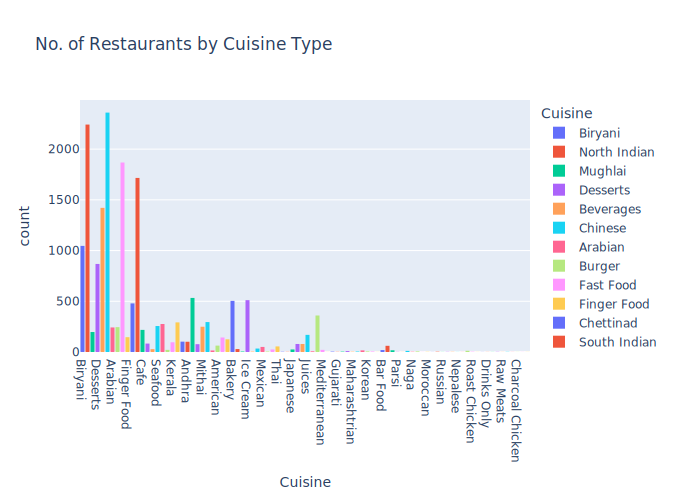

In [61]:
fig = px.histogram(zomato_df, x='Cuisine', color='Cuisine',  
             title= 'No. of Restaurants by Cuisine Type',  
             labels={'Cuisine':'Cuisine'}) 
 
fig.show() 

# Q2) What are the percentage of restaurants by Dining Rating in Chennai?


In [62]:
dining_rating_df = zomato_df['Dining Rating'].value_counts().reset_index() 
dining_rating_df.rename(columns={'index':'Dining Rating', 'Dining Rating':'COUNT OF RESTAURANTS'}, inplace=True) 
total = dining_rating_df['COUNT OF RESTAURANTS'].sum()
dining_rating_df['PERCENTAGE'] = (dining_rating_df['COUNT OF RESTAURANTS'] / total) * 100
dining_rating_df 

,Dining Rating,COUNT OF RESTAURANTS,PERCENTAGE
0,3.6,1557,8.655771
1,3.5,1363,7.577274
2,3.7,1356,7.538359
3,3.4,1273,7.076940
4,3.8,1250,6.949077
5,3.3,1190,6.615521
6,3.2,1087,6.042918
7,3.9,1083,6.020680
8,3.1,972,5.403602
9,4.0,861,4.786524


# Q3) Which are the Top 10 highest rated Seafood Restaurant in Chennai?

In [63]:
seafood_df = zomato_df[zomato_df['Cuisine'].str.contains('Seafood')] 
seafood_df.sort_values(by='Dining Rating',ascending=False).head(10) 

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Features
195,The Marina,Nungambakkam,Seafood,1600,4.8,1082,"['Home Delivery', 'Indoor Seating', 'Table res..."
292,Alchemy Bar & Lounge,Alwarpet,Seafood,2000,4.5,432,"['Full Bar Available', 'Live Sports Screening'..."
214,Sera - The Tapas Bar & Restaurant,Gopalapuram,Seafood,1600,4.5,964,"['Home Delivery', 'Full Bar Available', 'Free ..."
358,The Wharf 2.0 - Radisson BLU Templebay,Mamallapuram,Seafood,3000,4.4,517,"['Wheelchair Accessible', 'Full Bar Available'..."
342,L'attitude 49,Grande Bay Resort,Seafood,1800,4.4,563,"['Breakfast', 'Wheelchair Accessible', 'Full B..."
315,Layalee,Ekkaduthangal,Seafood,700,4.4,586,"['Home Delivery', 'Table booking recommended',..."
282,Bay View - Taj Fisherman's Cove Resort & Spa,Kanchipuram District,Seafood,3500,4.4,678,"['Wheelchair Accessible', 'Full Bar Available'..."
96,Urban Spatula,Anna Nagar,Seafood,800,4.4,794,"['Home Delivery', 'Free Parking', 'Table booki..."
14,Hotel Paramount,Kilpauk,Seafood,500,4.3,1266,"['Breakfast', 'Home Delivery', 'Indoor Seating..."
153,The Bayleaf,Gopalapuram,Seafood,800,4.3,542,"['Home Delivery', 'Indoor Seating', 'Wifi', 'T..."


# Q4) Which is the best Street Food location in Chennai?

In [64]:
foodtruck_df = zomato_df[zomato_df['Cuisine'] == 'Street Food'] 
foodtruck_df.sort_values(by='Dining Rating',ascending=False).head(2) 

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Features
37,Shree Mithai,Chetpet,Street Food,300,4.6,1085,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
9273,Ratna Cafe,Triplicane,Street Food,400,4.5,1083,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."


#  Q5) Which places have the highest rated restaurant for each Cuisine Type in Chennai?

In [65]:
 # Assuming restaurants having rating above 4.5 
 
highest_rated_df = zomato_df[zomato_df['Dining Rating'] >= 4.5] 
highest_rated_df

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Features
15,Welcome Hotel,Purasavakkam,South Indian,300,4.5,1094,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."
15,Welcome Hotel,Purasavakkam,Desserts,300,4.5,1094,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."
15,Welcome Hotel,Purasavakkam,Beverages,300,4.5,1094,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."
24,Eating Circles,Alwarpet,South Indian,250,4.7,782,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
37,Shree Mithai,Chetpet,Mithai,300,4.6,1085,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
...,...,...,...,...,...,...,...
9363,Flower Drum,Adyar,Chinese,800,4.5,617,"['Home Delivery', 'Wheelchair Accessible', 'Ve..."
9363,Flower Drum,Adyar,Thai,800,4.5,617,"['Home Delivery', 'Wheelchair Accessible', 'Ve..."
9367,Cream Stone,Thuraipakkam,Desserts,350,4.5,683,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
9367,Cream Stone,Thuraipakkam,Ice Cream,350,4.5,683,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."


#  Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Chennai?

In [66]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'Cuisine'])['Price for 2'].mean().reset_index() 
highest_rated_price_df.head() 

,Location,Cuisine,Price for 2
0,Adyar,Beverages,1800.0
1,Adyar,Chettinad,1800.0
2,Adyar,Chinese,800.0
3,Adyar,Desserts,1800.0
4,Adyar,Ice Cream,200.0


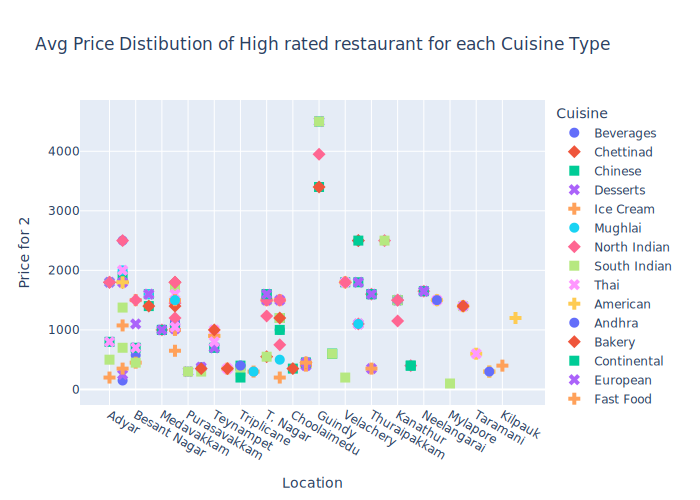

In [67]:
fig = px.scatter(highest_rated_price_df, x="Location", y="Price for 2", color="Cuisine", symbol="Cuisine",  
           title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
 
fig.show() 

#  Q7) Which areas have a large number of Chinese Restaurant Market?

In [70]:
chinese_df = zomato_df[zomato_df['Cuisine'].str.contains('Chinese')] 
area_chinese_counts = chinese_df['Location'].value_counts().reset_index()
area_chinese_counts.columns = ['Location', 'Chinese Restaurant Count']
area_chinese_counts.head(10)

,Location,Chinese Restaurant Count
0,Anna Nagar,112
1,Porur,82
2,T. Nagar,80
3,Ambattur,73
4,Perambur,66
5,Velachery,63
6,ECR,58
7,Ramapuram,57
8,Medavakkam,55
9,Mogappair,51


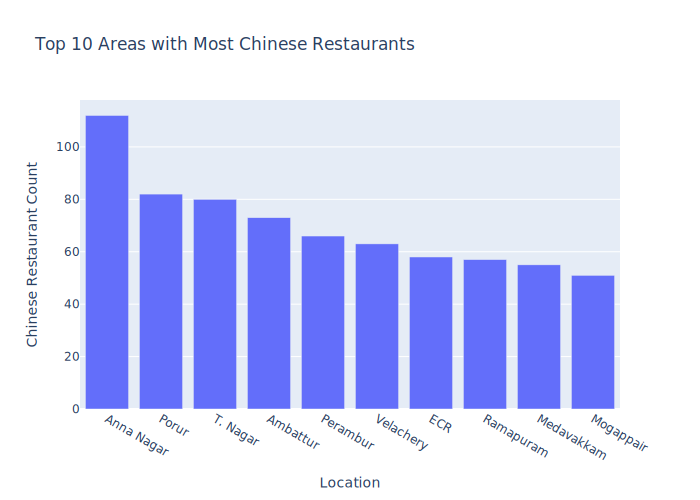

In [72]:
px.bar(area_chinese_counts.head(10), 
       x='Location', 
       y='Chinese Restaurant Count', 
       title='Top 10 Areas with Most Chinese Restaurants')

#  Q8) Is there a relation between Price and Rating by each Cuisine Type?

In [73]:
price_rating_df = zomato_df.groupby(['Cuisine', 'Dining Rating'])['Price for 2'].mean().reset_index() 
price_rating_df 

,Cuisine,Dining Rating,Price for 2
0,American,2.0,300.000000
1,American,2.4,800.000000
2,American,2.7,450.000000
3,American,2.8,866.666667
4,American,2.9,600.000000
...,...,...,...
1125,Wraps,3.6,300.000000
1126,Wraps,3.7,325.000000
1127,Wraps,4.0,300.000000
1128,Wraps,4.1,400.000000


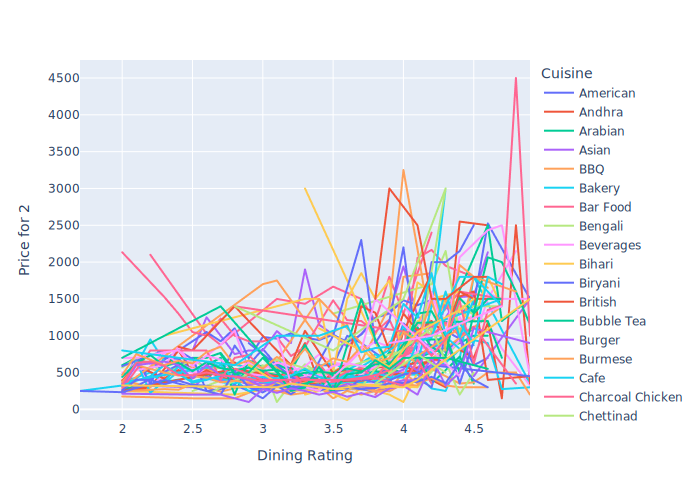

In [74]:
fig = px.line(price_rating_df, y="Price for 2", x="Dining Rating",color='Cuisine')
fig.show()

#  Q9) Is there a relation between Location and Price

In [75]:
location_price_df = zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index() 
location_price_df

,Location,Price for 2
0,...,1500.000000
1,A Radha Hotel,2040.000000
2,Adambakkam,334.782609
3,Adyar,582.561308
4,Akkarai,874.193548
...,...,...
110,Velachery,542.845118
111,Vepery,378.651685
112,Virugambakkam,413.445378
113,Washermenpet,381.761006


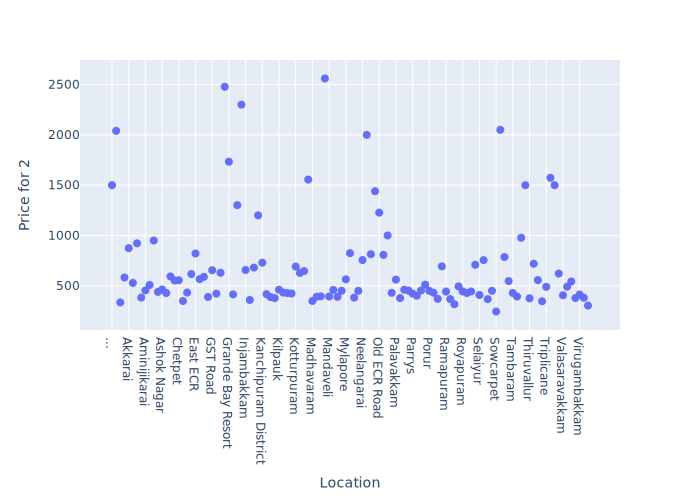

In [76]:
fig = px.scatter(location_price_df, x="Location", y="Price for 2").update_traces(marker_size=8) 
fig.show() 

#  Q10) Find the list of Affordable Restaurants?

The criteria for Affordable Restaurants would be:
 1) Low Price 2) High Rated
 
 First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
 
 Let me explain:-The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the restaurants that are   1/4th of 6000.

In [77]:
max_price = zomato_df['Price for 2'].max() 
one_fourth_price = max_price/4 
one_fourth_price 

1250.0

 # Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restaurant
 


In [80]:
aff_rest_df = zomato_df[['Name of Restaurant', 'Price for 2','Location', 'Cuisine']] 
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] <= 750] 
aff_rest_df.sort_values(by='Price for 2', inplace=True) 
aff_rest_df 

,Name of Restaurant,Price for 2,Location,Cuisine
4685,Soda Hub,40,Navallur,Beverages
1448,Mamee Soup,60,West Mambalam,Healthy Food
2508,Anmol Mohit Patiala,100,Sowcarpet,Beverages
4900,Mango And Tango,100,Nungambakkam,Beverages
4900,Mango And Tango,100,Nungambakkam,Juices
...,...,...,...,...
159,Superstar Pizza,750,Anna Nagar,Beverages
159,Superstar Pizza,750,Anna Nagar,Fast Food
159,Superstar Pizza,750,Anna Nagar,Pizza
142,Ente Keralam,750,Alwarpet,Kerala


In [81]:
# Finding the highest rated list of restaurants 
 
highrate_rest_df = zomato_df[['Name of Restaurant', 'Price for 2','Location', 'Cuisine','Dining Rating']] 
highrate_rest_df = highrate_rest_df[highrate_rest_df['Dining Rating'] >= 4.5] 
highrate_rest_df.sort_values(by='Price for 2', inplace=True) 
highrate_rest_df 

,Name of Restaurant,Price for 2,Location,Cuisine,Dining Rating
108,Rayar's Mess,100,Mylapore,South Indian,4.7
178,Royal Sandwich Shop,150,Alwarpet,Beverages,4.7
178,Royal Sandwich Shop,150,Alwarpet,Desserts,4.7
178,Royal Sandwich Shop,150,Alwarpet,Fast Food,4.7
9541,Bombay Kulfi,200,Anna Nagar,Ice Cream,4.6
...,...,...,...,...,...
443,Avartana - ITC Grand Chola,4500,Guindy,Chinese,4.8
443,Avartana - ITC Grand Chola,4500,Guindy,Desserts,4.8
303,Peshawri - ITC Grand Chola,4500,Guindy,Mughlai,4.6
443,Avartana - ITC Grand Chola,4500,Guindy,South Indian,4.8


Now, we will merge the aff_rest_df with highrate_rest_df to obtain the intersection i.e the list of Affordable Restaurants !!

In [82]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['Name of Restaurant', 'Location']) 
highrate_aff_df = highrate_aff_df[['Name of Restaurant', 'Price for 2_x', 'Location', 'Cuisine_x']] 
highrate_aff_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price for 2', 
                                'Location':'Location', 'Cuisine_x':'Cuisine'},inplace=True)

In [83]:
# Affordable Restaurants with low price and high rating  
 
highrate_aff_df 

,Name of Restaurant,Price for 2,Location,Cuisine
0,Rayar's Mess,100,Mylapore,South Indian
1,Royal Sandwich Shop,150,Alwarpet,Beverages
2,Royal Sandwich Shop,150,Alwarpet,Beverages
3,Royal Sandwich Shop,150,Alwarpet,Beverages
4,Royal Sandwich Shop,150,Alwarpet,Desserts
...,...,...,...,...
260,Blind Ch3mistry,700,Besant Nagar,Cafe
261,Blind Ch3mistry,700,Besant Nagar,Cafe
262,Blind Ch3mistry,700,Besant Nagar,Cafe
263,Blind Ch3mistry,700,Besant Nagar,Cafe


#  Q11) Find the list of Restaurants with outdoor seating facility?

In [84]:
#outdoor_df = zomato_df[zomato_df['Features'].str.contains('Chinese')] 

# Remove brackets and split by commas
zomato_df['Features'] = zomato_df['Features'].str.replace(r"[\[\]']", '', regex=True)
zomato_df['Features'] = zomato_df['Features'].str.split(',')

# Explode and clean
zomato_df = zomato_df.explode('Features')
zomato_df['Features'] = zomato_df['Features'].str.strip()
outdoor_df = zomato_df[zomato_df['Features'].str.contains('Outdoor Seating')] 
outdoor_df

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Features
42,Orange Wok,Nungambakkam,Malaysian,1000,4.2,774,Outdoor Seating
42,Orange Wok,Nungambakkam,Asian,1000,4.2,774,Outdoor Seating
42,Orange Wok,Nungambakkam,Chinese,1000,4.2,774,Outdoor Seating
60,Pantry d'or,Anna Nagar,Continental,750,4.4,2485,Outdoor Seating
60,Pantry d'or,Anna Nagar,American,750,4.4,2485,Outdoor Seating
...,...,...,...,...,...,...,...
11351,Aavin Parlour,Kolathur,Ice Cream,200,3.0,5,Outdoor Seating
11623,Cafe Chocolicious,GST Road,Fast Food,500,3.0,6,Outdoor Seating
11623,Cafe Chocolicious,GST Road,Beverages,500,3.0,6,Outdoor Seating
11643,Natural Fresh Ice Cream,Triplicane,Ice Cream,150,3.1,22,Outdoor Seating
